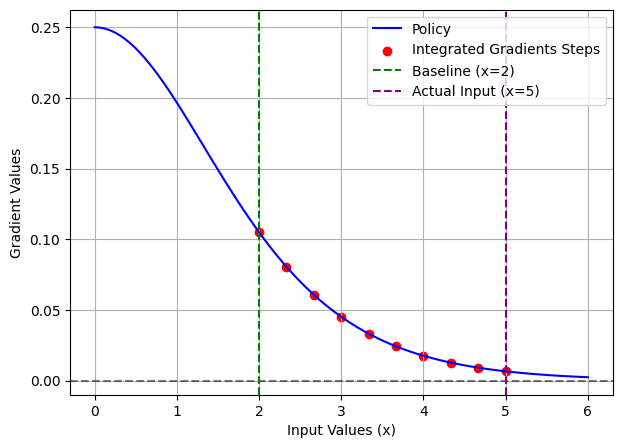

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def func(x):
    return np.sin(x)  # Example function

def derivative(x):
    return np.cos(x)  # Derivative of sin(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x_values = np.linspace(0, 6, 100)
y_values = sigmoid(x_values)
dy_values = sigmoid_derivative(x_values)

# Set baseline to x = 2
baseline_x = 2
baseline_y = sigmoid(baseline_x)

# Define the actual input at x = 5
actual_input_x = 5

# Define steps for integrated gradients from baseline (x=2) to actual input (x=5)
num_steps = 10
alpha_values = np.linspace(0, 1, num_steps)
step_points_x = baseline_x + alpha_values * (actual_input_x - baseline_x)  # Move towards x=5
step_points_y = sigmoid_derivative(step_points_x)

# Plot sigmoid derivative with integrated gradients steps from baseline to actual input
plt.figure(figsize=(7, 5))
plt.plot(x_values, dy_values, label="Policy", color="blue")
plt.scatter(step_points_x, step_points_y, color="red", label="Integrated Gradients Steps")
plt.axhline(0, color='black', linestyle="--", alpha=0.5)
plt.axvline(baseline_x, color='green', linestyle="--", label="Baseline (x=2)")
plt.axvline(actual_input_x, color='purple', linestyle="--", label="Actual Input (x=5)")

# Labels and legend
plt.xlabel("Input Values (x)")
plt.ylabel("Gradient Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("IG_exmaple.pdf")



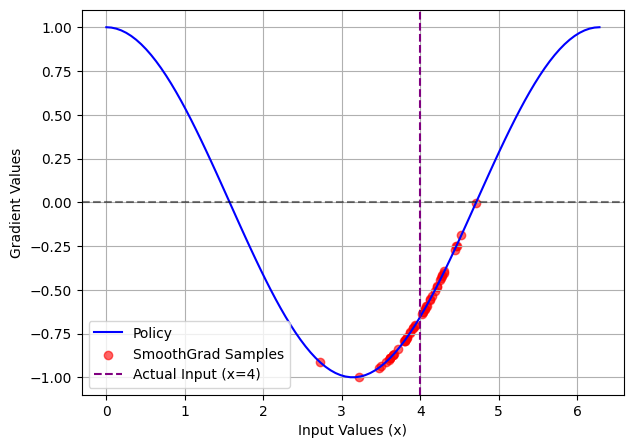

In [23]:
import numpy.random as rnd

# Define the actual input at x = 5
actual_input_x = 4

x_values = np.linspace(0, 2*np.pi, 100)
y_values = func(x_values)
dy_values = derivative(x_values)

# Define parameters for SmoothGrad
num_samples = 50  # Number of noisy samples
noise_stddev = 0.4  # Standard deviation of noise

# Generate noisy samples around the actual input (x=5)
noisy_samples_x = actual_input_x + rnd.normal(scale=noise_stddev, size=num_samples)
noisy_samples_y = derivative(noisy_samples_x)
noisy_samples_x = np.clip(noisy_samples_x, 0, 6)  # Clip to the valid range

# Plot sigmoid derivative with SmoothGrad noisy samples
plt.figure(figsize=(7, 5))
plt.plot(x_values, dy_values, label="Policy", color="blue")
plt.scatter(noisy_samples_x, noisy_samples_y, color="red", alpha=0.6, label="SmoothGrad Samples")
plt.axhline(0, color='black', linestyle="--", alpha=0.5)
plt.axvline(actual_input_x, color='purple', linestyle="--", label="Actual Input (x=4)")

# Labels and legend
plt.xlabel("Input Values (x)")
plt.ylabel("Gradient Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("Smoothgrad_Example.pdf")
